In [229]:
%matplotlib inline
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from operator import add
from functools import reduce

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size': 15})

In [162]:
def true_model(x):
    gausses = [[0, 0.5, 1], [2, 0.3, 0.5], [4, 0.3, 0.2]]
    return reduce(add, [gauss[2] * np.exp(-(x - gauss[0]) ** 2 / gauss[1]) for gauss in gausses])
def noisy_model(x):
    #return true_model(x) + np.random.normal(0, 0.1, np.shape(x))
    return np.random.poisson(true_model(x) * 30) / 30

In [171]:
x = np.arange(-2, 6, 0.05)
y = true_model(x)
yn = noisy_model(x)

In [172]:
yc = scipy.signal.convolve(yn, np.ones(30) / 30., mode="same")

In [173]:
ys = scipy.signal.savgol_filter(yn, 31, 3)

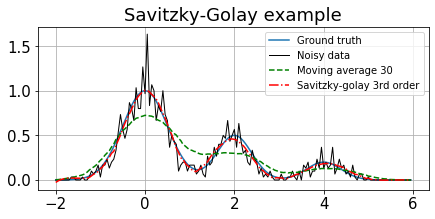

In [174]:
plt.subplots(figsize=(7,3))
plt.plot(x, y, label="Ground truth")
plt.plot(x, yn, 'k', linewidth=1, label="Noisy data")
plt.plot(x, yc, "--g", label="Moving average 30")
plt.plot(x, ys, "-.r", label="Savitzky-golay 3rd order")
plt.grid()
plt.legend(fontsize=10)
plt.title("Savitzky-Golay example")
plt.savefig("../statistics/images/savgol-example.pdf")

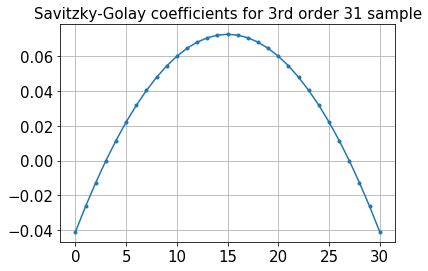

In [133]:
plt.plot(scipy.signal.savgol_coeffs(31, 3), ".-")
plt.grid()
plt.title("Savitzky-Golay coefficients for 3rd order 31 sample", fontsize=15)
plt.savefig("../statistics/images/savgol-coeffs.pdf")

(441, 10) 2
(10, 441) (441, 10)


C:\Users\masah\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.


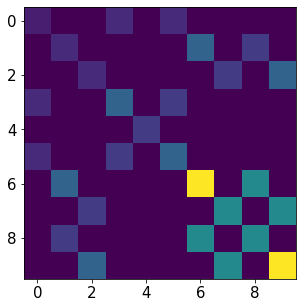

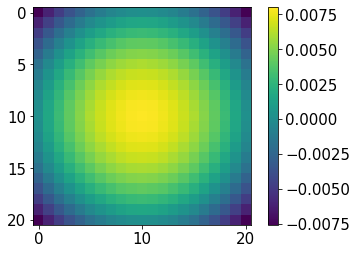

In [222]:
vx = np.linspace(-2, 2, 21)
vy = np.linspace(-2, 2, 21)
xmesh, ymesh = np.meshgrid(vx, vy)
#x = [0, 0.5, 0.5, 0, 1, 0, 1, 1]
#y = [0, 0, 1, 1, 0, 0.5, 0.5, 1]
x = np.array(xmesh.flat)
y = np.array(ymesh.flat)
x2 = x ** 2
y2 = y ** 2
xy = x * y
xxy = x * x * y
xyy = x * y * y
x3 = x ** 3
y3 = y ** 3
X = np.vstack([np.ones(len(x)), x, y, x2, xy, y2, x3, xxy, xyy, y3]).T
plt.subplots(figsize=(5,5))
plt.imshow(X.T @ X)
print(X.shape, np.rank(X))
R = np.matrix(X.T @ X) ** -1 * X.T
print(R.shape, X.shape)
plt.figure()
plt.imshow(R[0,:].reshape(len(vx), -1))
plt.colorbar()

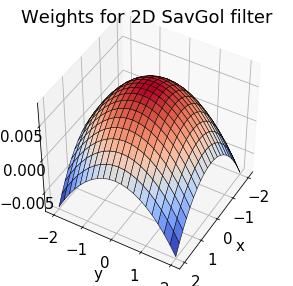

In [242]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xmesh, ymesh, R[0,:].reshape(len(vx), -1), cmap=cm.coolwarm, linewidth=0.5, edgecolor="k")
ax.view_init(45, 30)
plt.title('Weights for 2D SavGol filter')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('../statistics/images/savgol2d.pdf')